# TÉMA: SIR-modell

## FRICSKA FANNI - UGT6EV
## SZEKERES LAURA - AGKXVQ
## PÉCSI ZOLTÁN - Y0WB43

1. motiváció: miért/hol érdekes amit vizsgálunk

2. az "elmélet" (definíciók, formalizmus, algoritmusok) rövid bemutatása

3. implementációról röviden (a legtöbb dolog megtalálható git-en vagy valamilyen tutoriálban, de hivatkozzuk, honnan vettük)

4. eredmények bemutatása (vizuálizáció, összefoglaló táblázat és ábrák, stb.)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import ipywidgets as widgets
plt.style.use('ggplot')
#from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

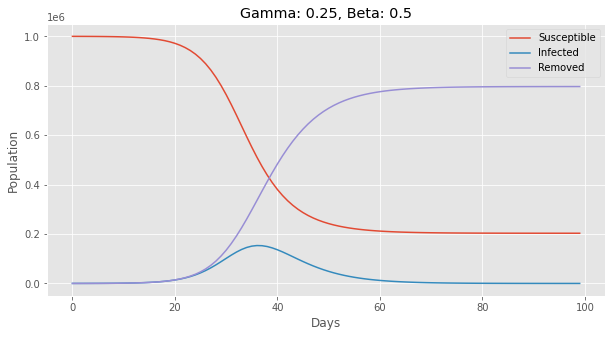

In [27]:


def dAdt(A, t, beta, gamma, N):
    S = A[0]
    I = A[1]
    R = A[2]
     
    return [
        -beta/N * S * I,
        beta/N * S * I - gamma * I,
        gamma * I
    ]


times = np.arange(0,100,1) #100 nap
gamma = 0.25 #"Gyogyulasi rata"
N = 1000000 #Populacio
beta = 0.5 #Fertozesi rata
S0,I0,R0 = N-100, 100, 0 #Kezdeti ertekek: N-100 lehetseges fertozo, 100 fertozott, 0 "gyogyult"

sol = odeint(dAdt, y0=[S0,I0,R0], t=times, args=(beta,gamma,N))

S = sol.T[0]
I = sol.T[1]
R = sol.T[2]

plt.figure(figsize=(10,5))
plt.title(f'Gamma: {gamma}, Beta: {beta}')
plt.plot(times, S, label = "Susceptible")
plt.plot(times, I, label = "Infected")
plt.plot(times, R, label = "Removed")
plt.legend()

plt.xlabel("Days")
plt.ylabel("Population")
plt.show()